In [2]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
stats = pd.read_csv("P4-Movie-Ratings.csv")

In [4]:
stats.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                         559 non-null object
Genre                        559 non-null object
Rotten Tomatoes Ratings %    559 non-null int64
Audience Ratings %           559 non-null int64
Budget (million $)           559 non-null int64
Year of release              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [6]:
stats.columns = ['Name', 'Genre', 'RottenTomatoesRate', 'AudienceRate', 'Budget', 'ReleaseYear'];

In [7]:
movies = stats;

In [8]:
movies.ReleaseYear = movies.ReleaseYear.astype('category')
movies.Genre = movies.Genre.astype('category')

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Name                  559 non-null object
Genre                 559 non-null category
RottenTomatoesRate    559 non-null int64
AudienceRate          559 non-null int64
Budget                559 non-null int64
ReleaseYear           559 non-null category
dtypes: category(2), int64(3), object(1)
memory usage: 19.2+ KB


In [10]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

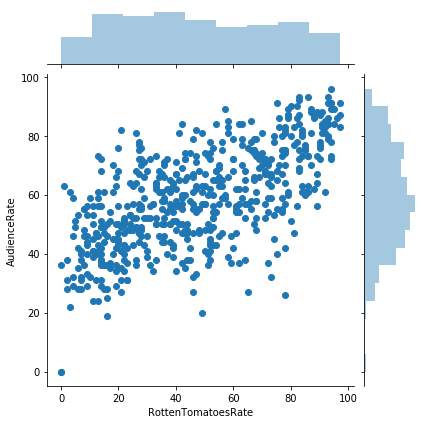

In [11]:
# joint plot
j = sns.jointplot(data=movies, x='RottenTomatoesRate' , y='AudienceRate')

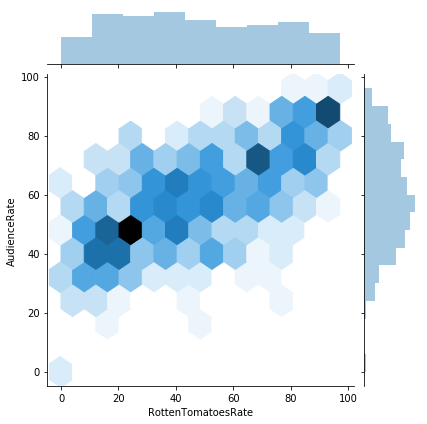

In [12]:
j = sns.jointplot(data=movies, x='RottenTomatoesRate' , y='AudienceRate', kind='hex')

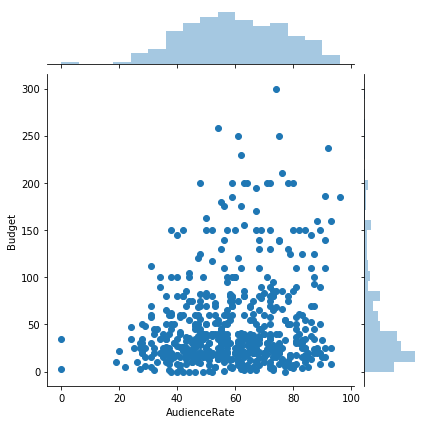

In [13]:
j = sns.jointplot(data=movies, x='AudienceRate' , y='Budget')

(array([ 2.,  0.,  1.,  5., 20., 42., 48., 81., 76., 65., 67., 60., 45.,
        35., 12.]),
 array([ 0. ,  6.4, 12.8, 19.2, 25.6, 32. , 38.4, 44.8, 51.2, 57.6, 64. ,
        70.4, 76.8, 83.2, 89.6, 96. ]),
 <a list of 15 Patch objects>)

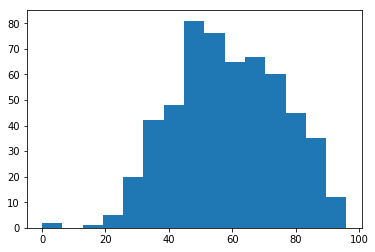

In [14]:
# histogram
plt.hist(movies.AudienceRate, bins=15)

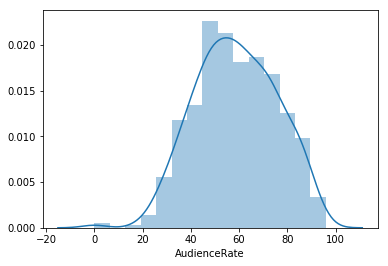

In [15]:
sns.distplot(movies.AudienceRate, bins=15)

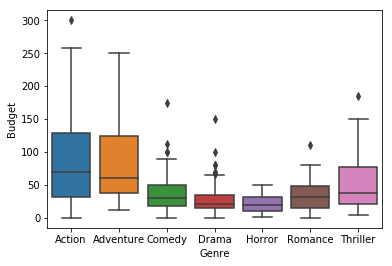

In [16]:
sns.boxplot(data=movies, x='Genre', y='Budget')

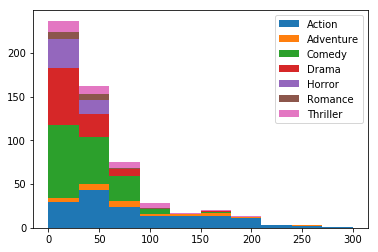

In [17]:
lst = list();
labels = list();
for gnr in movies.Genre.cat.categories:
    lst.append( movies[movies.Genre == gnr ].Budget );
    labels.append(gnr);
    
plt.hist(lst, bins=10, stacked=True, label=labels);
plt.legend();
plt.show();

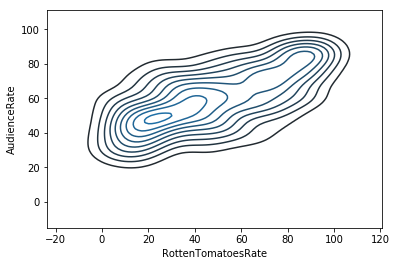

In [18]:
j = sns.kdeplot(movies.RottenTomatoesRate , movies.AudienceRate)

[(-20, 160)]

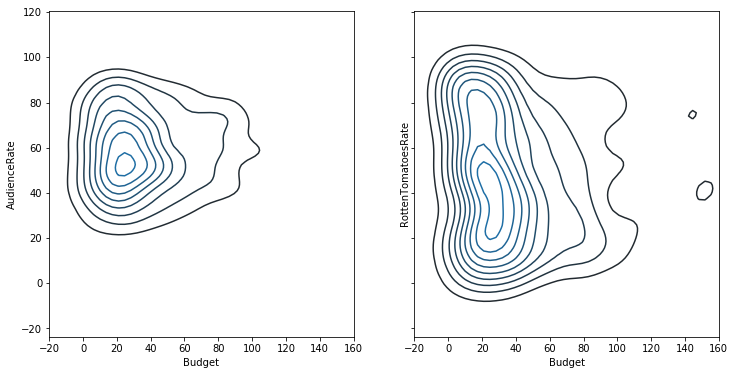

In [19]:
f, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True);
f1 = sns.kdeplot(movies.Budget , movies.AudienceRate, ax=ax[0])
f2 = sns.kdeplot(movies.Budget , movies.RottenTomatoesRate, ax=ax[1])
f1.set(xlim=(-20,160))

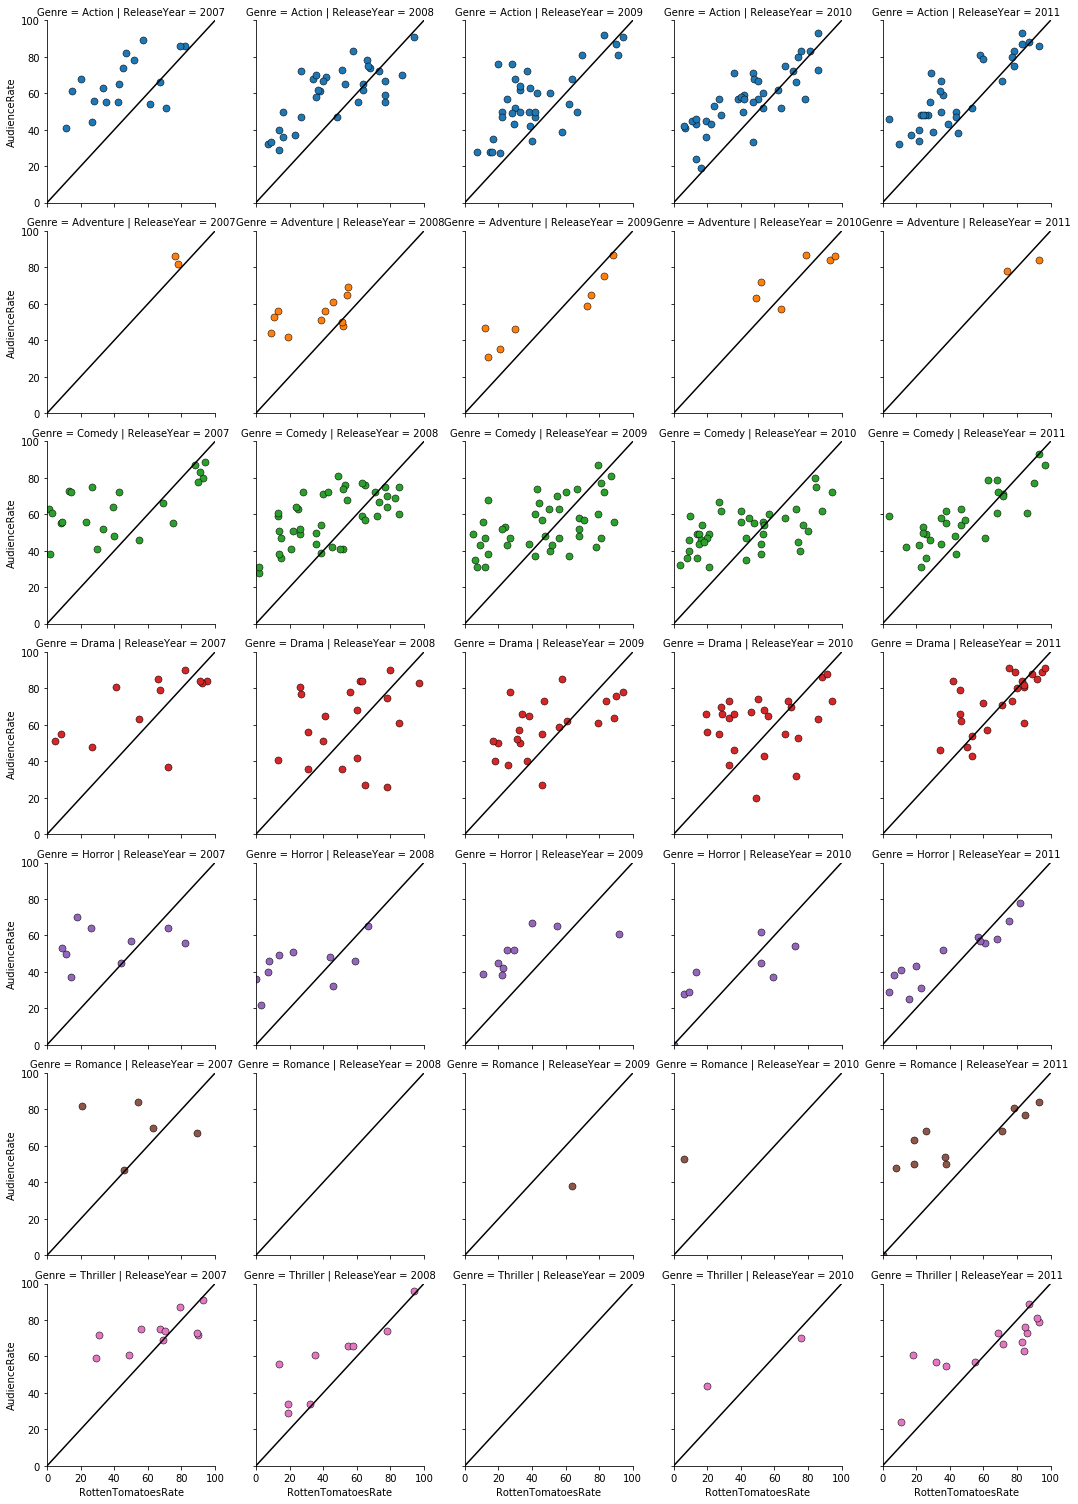

In [20]:
kws = dict(s=50, linewidth=0.5, edgecolor='Black')
q = sns.FacetGrid(movies, row='Genre', col='ReleaseYear', hue='Genre').map(plt.scatter, 'RottenTomatoesRate', 'AudienceRate', **kws)
q.set(xlim=(0, 100), ylim=(0, 100))
for ax in q.axes.flat:
    ax.plot((0, 100), (0,100), c='Black')

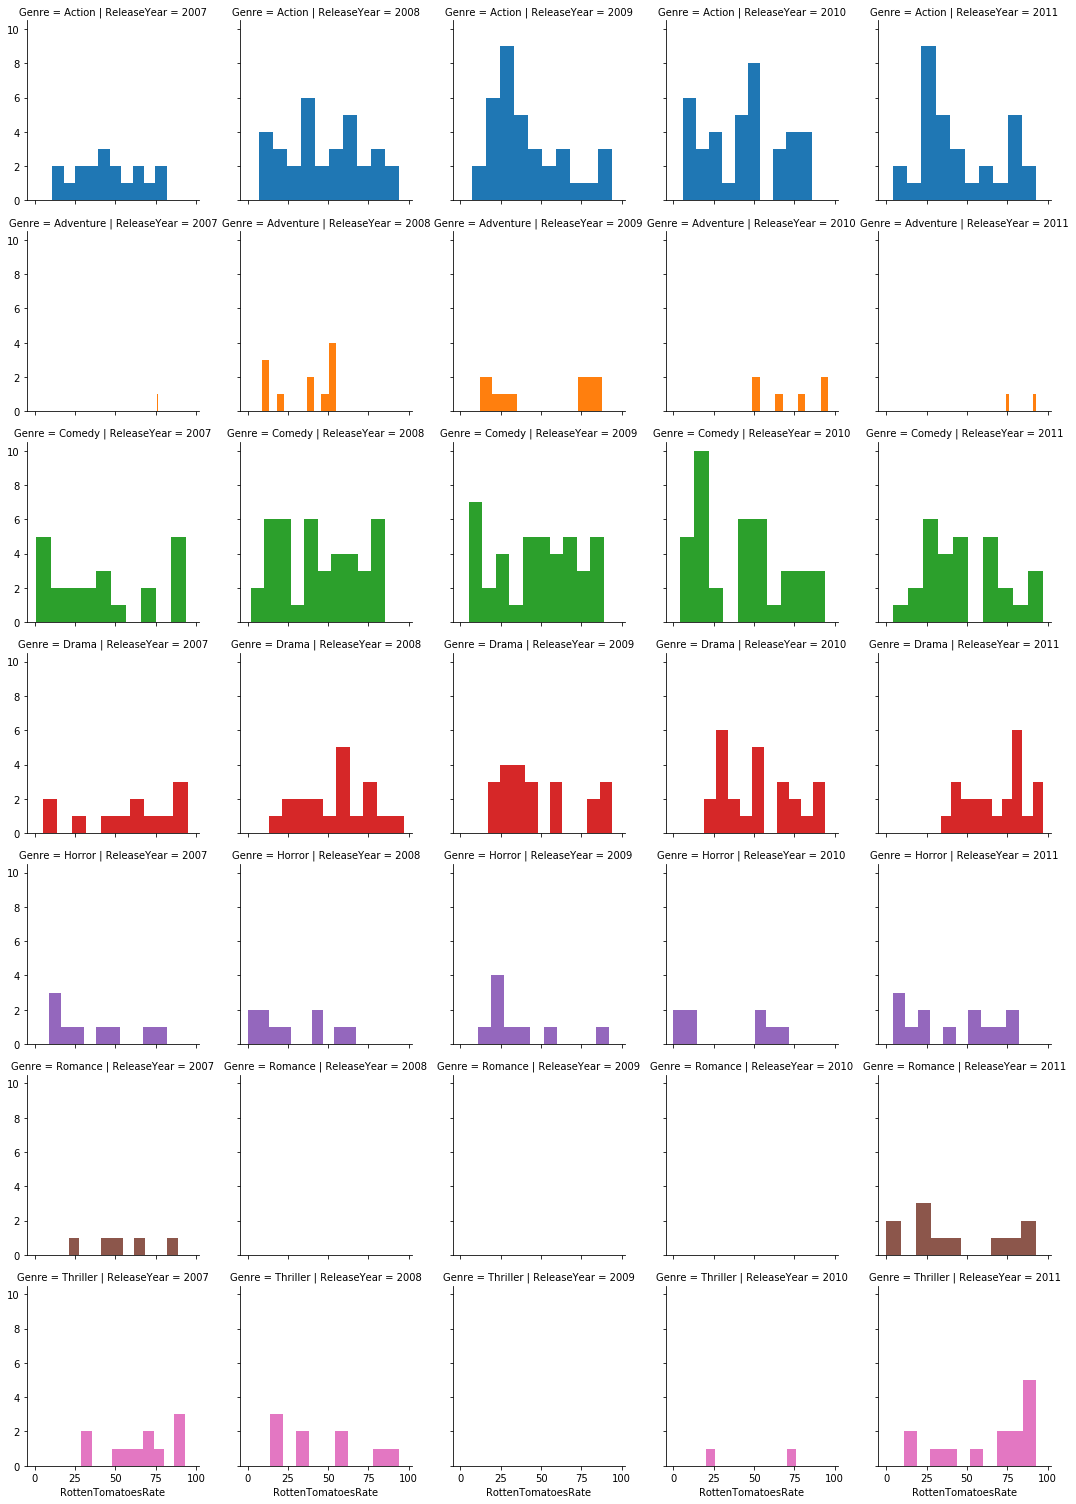

In [21]:
q = sns.FacetGrid(movies, row='Genre', col='ReleaseYear', hue='Genre').map(plt.hist, 'RottenTomatoesRate', bins=10)

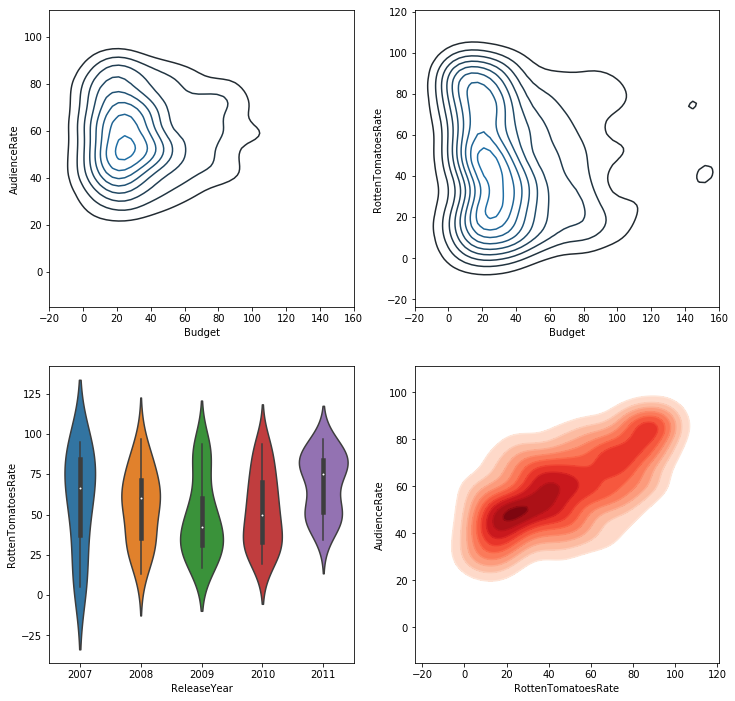

In [22]:
f, ax = plt.subplots(2, 2, figsize=(12, 12));
f1 = sns.kdeplot(movies.Budget , movies.AudienceRate, ax=ax[0][0])
f2 = sns.kdeplot(movies.Budget , movies.RottenTomatoesRate, ax=ax[0][1])
f1.set(xlim=(-20,160))
f2.set(xlim=(-20,160))
f3 = sns.violinplot(data=movies[movies.Genre ==  'Drama'], x='ReleaseYear', y='RottenTomatoesRate', ax=ax[1][0])
f4a = sns.kdeplot(movies.RottenTomatoesRate, movies.AudienceRate, shade=True, shade_lowest=False, cmap='Reds', ax=ax[1][1])
f4b = sns.kdeplot(movies.RottenTomatoesRate, movies.AudienceRate, cmap='Reds', ax=ax[1][1])

In [82]:
challenge = pd.read_csv('P4-Section6-Homework-Dataset.csv', sep=',', encoding='ISO-8859-1')

In [83]:
challenge

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5
6,Thursday,Rob Marshall,adventure,Into the Woods,25/12/2014,Buena Vista Studios,213.9,50.0,212.9,6.0,3.16,84.9,39.9,162.9,325.8,125,128.0,60.1
7,Friday,Daniel Espinosa,action,Safe House,10/02/2012,Universal,215.5,85.0,208.1,6.8,3.45,81.7,39.3,123.1,144.8,115,126.4,60.7
8,Friday,Gary Shore,action,Dracula Untold,10/10/2014,Universal,216.5,70.0,215.5,6.3,2.92,159.2,73.9,145.5,207.9,92,56.3,26.1
9,Friday,"Henry Joost, Ariel Schulman",horror,Paranormal Activity 3,21/10/2011,Paramount Pictures,218.8,5.0,207,5.9,2.90,103,49.8,202,4040.0,84,104.0,50.2


In [84]:
challenge.columns = ['DayOfWeek', 'Director', 'Genre', 'Title', 'Release', 'Studio', 'AdjustedGross', 'Budget', \
                 'Gross', 'IMDBRating', 'MovieLensRating', 'OverseasGross', 'PercOverseasGross', 'Profit', 'PercProfit', \
                 'Runtime', 'USGross', 'PercUSGross'];

In [89]:
challenge.Studio = challenge.Studio.astype('category')
challenge.Genre = challenge.Genre.astype('category')
challenge.DayOfWeek = challenge.DayOfWeek.astype('category')
challenge.Director = challenge.Director.astype('category')


In [91]:
challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
DayOfWeek            608 non-null category
Director             608 non-null category
Genre                608 non-null category
Title                608 non-null object
Release              608 non-null object
Studio               608 non-null category
AdjustedGross        608 non-null object
Budget               608 non-null float64
Gross                608 non-null object
IMDBRating           608 non-null float64
MovieLensRating      608 non-null float64
OverseasGross        608 non-null object
PercOverseasGross    608 non-null float64
Profit               608 non-null object
PercProfit           608 non-null float64
Runtime              608 non-null int64
USGross              608 non-null float64
PercUSGross          608 non-null float64
dtypes: category(4), float64(7), int64(1), object(6)
memory usage: 84.7+ KB


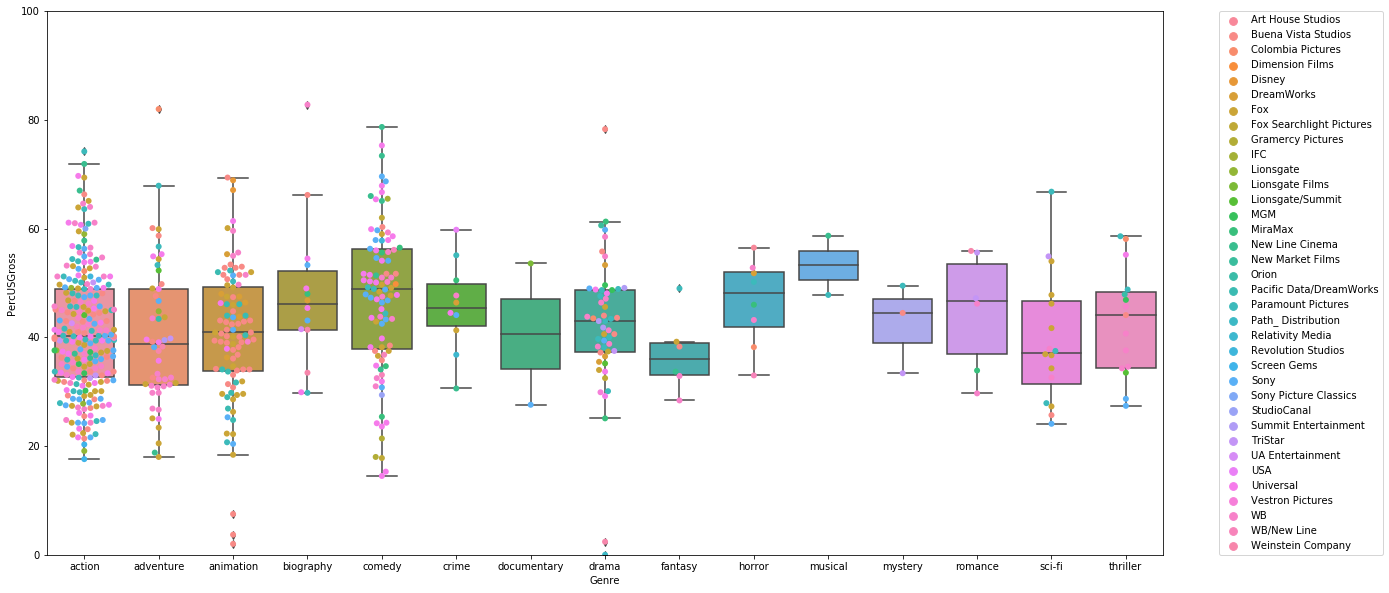

In [117]:
plt.rcParams['figure.figsize'] = 20, 10
p1 = sns.boxplot(data=challenge, x='Genre', y='PercUSGross')
p1 = sns.swarmplot(data=challenge, x='Genre', y='PercUSGross', hue='Studio', size=6)
p1.set(ylim=(0,100))
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)